In [3]:
from work.pca import *
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [16]:
src_path= r'D:\Clarifruit\cherry_stem\data\unet_data\training\2019-10-07_20-12-39\thres_0.4\hsv_histograms'
df= load_npy_data(src_path)
df.head()

,file_name,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,38357-02789.png,0.007895,0.0,0.003158,0.003158,0.005526,0.008684,0.013421,0.018947,0.055263,...,0.018649,0.025642,0.016318,0.016318,0.025642,0.032635,0.027973,0.016318,0.013986,0.088581
1,38357-12440.png,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004139,0.006899,0.026214,...,0.020562,0.049349,0.069912,0.053462,0.053462,0.049349,0.032900,0.061687,0.053462,0.300208
2,38357-13707.png,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001823,0.004558,...,0.005635,0.014087,0.011270,0.005635,0.016905,0.016905,0.008452,0.008452,0.000000,0.028175
3,38357-27009.png,0.000679,0.0,0.000000,0.000000,0.001357,0.004072,0.002036,0.010180,0.009502,...,0.027961,0.027961,0.044271,0.018641,0.011650,0.016310,0.020971,0.025631,0.034951,0.163105
4,38357-42160.png,0.000894,0.0,0.000000,0.000000,0.000894,0.000894,0.006258,0.012515,0.014303,...,0.014268,0.004756,0.011890,0.016646,0.009512,0.021402,0.030914,0.049938,0.028536,0.152191


In [25]:
y=df['file_name']
X=df.drop('file_name',axis=1)

In [26]:

X_embedded = TSNE(n_components=3).fit_transform(X)

In [29]:
n_comp = 11
# PCA
print('\nRunning PCA ...')
pca = IncrementalPCA(n_components=n_comp)
X_pca = pca.fit_transform(x)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.8996
Individual variance contributions:
0.5489584799299946
0.17431559521681314
0.0545330594857132
0.03498844557421794
0.025385146400120122
0.01899648669099447
0.012533211449045442
0.009784604906019099
0.008626227680095027
0.0064024435822695545
0.005034988848178589


In [41]:
X_pca[0]

array([-0.63036095,  0.81614371, -0.3904704 ,  0.02479626,  0.00469854,
       -0.04357757,  0.22528503, -0.12581088,  0.14511087,  0.06665049,
       -0.06112315])

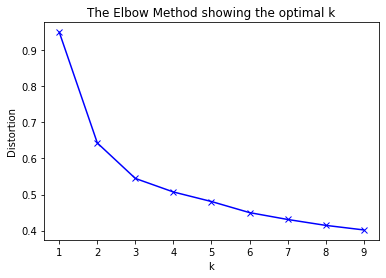

In [5]:
plt.plot()
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_pca)
    distortions.append(sum(np.min(cdist(X_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_pca.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
pred = KMeans(n_clusters=4).fit_predict(X_embedded)
np.unique(pred)

array([0, 1, 2, 3])

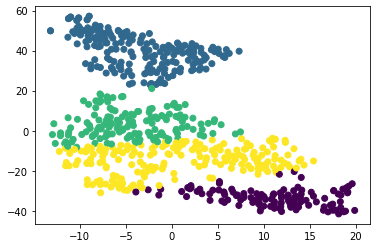

In [10]:
#pca_plt_data = X_pca[:,:2]
pca_plt_data = X_embedded
plt.figure()
plt.scatter(pca_plt_data[:,0],pca_plt_data[:,1],c=pred)

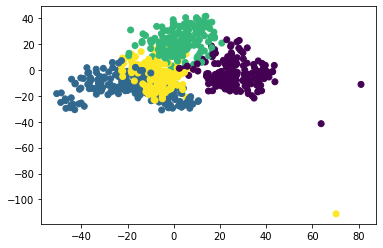

In [28]:
#pca_plt_data = X_pca[:,:2]
pca_plt_data = X_embedded
plt.figure()
plt.scatter(pca_plt_data[:,0],pca_plt_data[:,1],c=pred)

In [29]:
res = list(zip(y,pred))

In [30]:
res[0]

('38357-02789.png', 2)

In [31]:
save_path=r'D:\Clarifruit\cherry_stem\data\unet_data\training\2019-10-07_20-12-39\tsne'
img_path = r'D:\Clarifruit\cherry_stem\data\raw_data\images_orig'


In [32]:
from work.stem_classifier.classify import get_pred_via_list


get_pred_via_list(res,save_path, img_path,img_extention='.png.jpg')